# CIFAR-10

The code below will be the training process with convolutional neural networks(a.k.a CNN) of the cifar-10 dataset.

The augmentation codes for images and configuration files are contained in './cifar10/*' folder.

## Step 1. CIFAR-10 Data Loading Processing

Below will be the simple code of loading the cifar-10 data batches into python array formats.

Each images and labels will be stored into 'train_images', 'train_labels'.

In [1]:
import os
os.chdir('../cifar10/') # change the current os directory for importation.

import batch_load as datasets # import the train/test data batch loading python file.
import test as tst
import config as cf
from network import *
import network
os.chdir('../notebook/') # change the directory back to the current dataset.

## Step 1-1. Upload Confirmation

The given images should be (32x32) in RGB format, and the training batch should contain 50000 examples.

Each example will have a lable for which class it is in.

There are 10 classes, 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.

Therefore, the dimension for train_images should be (50000, 32, 32, 3) and train_labels should be (50000,)

In [2]:
def named_classifier(label):
    """
    Claasifying encoded labels into string names.

    @ Return : string label

    """
    str_array=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    return str_array[label]

In [3]:
train_images, train_labels = datasets.load_cifar10(is_train=True)
print train_images.shape, train_labels.shape

(50000, 32, 32, 3) (50000,)


## Step 1-2. Plotting Uploaded Images

To confirm that the images were uploaded correctly, we will randomly plot out a subset of the training batch.

We will first import the basic dependencies, then will randomly print out 25 images and its labels.

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
def implot_RGB(img, normalize=True):
    """
    Tiny helper to show images as uint8 and remove axis labels.

    @ Return : Image plot

    """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

Actual Label Examples : 


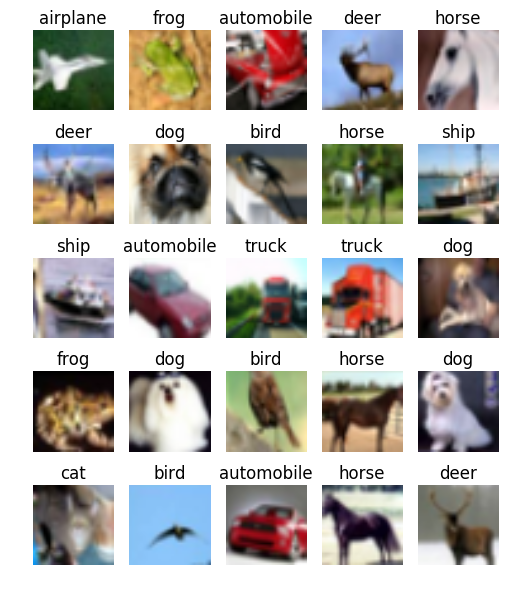

In [6]:
print('Actual Label Examples : ')
for i in range(25) :
    r = random.randint(0, len(train_labels))
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(top = 1.5)
    implot_RGB(train_images[r])
    plt.title(named_classifier(train_labels[r]))

In [7]:
cf.train = False
test_images, predicts, actual = tst.run(eval("vggnet()"))

Model restored.

Test accuracy: 93.21%



Prediction Results : 


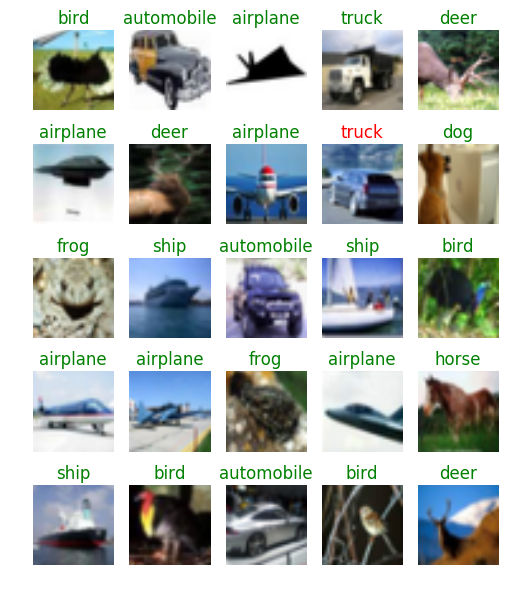

In [10]:
print('Prediction Results : ')
for i in range(25) :
    r = random.randint(0, len(actual))
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(top = 1.5)
    implot_RGB(test_images[r])
    if (predicts[r] == actual[r]):
        plt.title(named_classifier(predicts[r]), color='green')
    else :
        plt.title(named_classifier(predicts[r]), color='red')